In [2]:
import numpy as np
from scipy import stats
import pyvinecopulib as pv
import matplotlib.pyplot as plt
import matplotlib


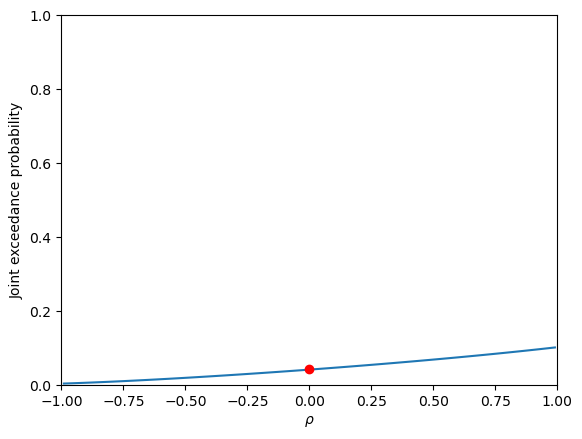

In [14]:




def joint_exceedance(rho):
    x = [4, 6]
    X = stats.multivariate_normal(mean=[3, 5],
                              cov=[[1.00, rho],
                                   [rho, 2.60]])
    
    X1 = stats.norm(loc=3, scale=1.0)
    X2 = stats.norm(loc=5, scale=1.6)

    p1 = X1.cdf(x[0])
    p2 = X2.cdf(x[1])
    p = X.cdf(x)

    return 1 - p1 - p2 + p

rho = np.linspace(-0.99, 0.99, 100)
p = np.zeros(len(rho))
for i, r in enumerate(rho):
    p[i] = joint_exceedance(r)


plt.plot(rho, p)
plt.plot(0,
         (1-stats.norm(loc=3, scale=1.0).cdf(4))*(1-stats.norm(loc=5, scale=1.6).cdf(6)),
         'r', marker='o')
plt.xlabel(r'$\rho$')
plt.ylabel('Joint exceedance probability')
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.show()